In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=Warning)

# Return Forecasting: Time Series Analysis & Modelling with CAD-PHY Exchange rate data.
In this notebook, you will load historical Canadian Dollar-Yen exchange rate futures data and apply time series analysis and modeling to determine whether there is any predictable behavior.

In [2]:
# Currency pair exchange rates for CAD/JPY
cad_jpy_df = pd.read_csv(
    Path("cad_jpy.csv"), index_col="Date", infer_datetime_format=True, parse_dates=True
)
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1982-01-05,184.65,184.65,184.65,184.65
1982-01-06,185.06,185.06,185.06,185.06
1982-01-07,186.88,186.88,186.88,186.88
1982-01-08,186.58,186.58,186.58,186.58
1982-01-11,187.64,187.64,187.64,187.64


In [3]:
# Trim the dataset to begin on January 1st, 1990
cad_jpy_df = cad_jpy_df.loc["1990-01-01":, :]
cad_jpy_df.head()

,Price,Open,High,Low
Date,,,,
1990-01-02,126.37,126.31,126.37,126.31
1990-01-03,125.30,125.24,125.30,125.24
1990-01-04,123.46,123.41,123.46,123.41
1990-01-05,124.54,124.48,124.54,124.48
1990-01-08,124.27,124.21,124.27,124.21


# Initial Time-Series Plotting

 Start by plotting the "Settle" price. Do you see any patterns, long-term and/or short?

In [4]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CAD/JPY')

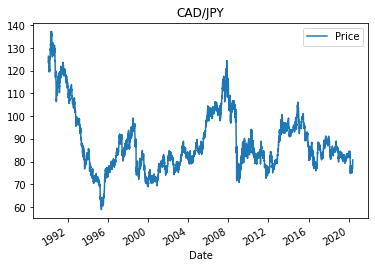

In [5]:
# Plot just the "Price" column from the dataframe:
# YOUR CODE HERE!
cad_jpy_df.plot(y="Price")
plt.title("CAD/JPY")

**Question:** Do you see any patterns, long-term and/or short? 

**Answer:** YOUR ANSWER HERE

In short term, I am seeing a downward trend, and in thr long term, I am seeing a upward trend.

# Decomposition Using a Hodrick-Prescott Filter

 Using a Hodrick-Prescott Filter, decompose the exchange rate price into trend and noise.

In [10]:
import statsmodels.api as sm

# Apply the Hodrick-Prescott Filter by decomposing the exchange rate price into two separate series:
# YOUR CODE HERE!
cad_jpy_decomp = sm.tsa.filters.hpfilter(cad_jpy_df["Price"])
noise, trend = cad_jpy_decomp

In [11]:
# Create a dataframe of just the exchange rate price, and add columns for "noise" and "trend" series from above:
# YOUR CODE HERE!
cad_jpy_df_decomp = pd.DataFrame(cad_jpy_df["Price"])
cad_jpy_df_decomp["noise"] = noise
cad_jpy_df_decomp["trend"] = trend
cad_jpy_df_decomp.head()

,Price,noise,trend
Date,,,
1990-01-02,126.37,0.519095,125.850905
1990-01-03,125.30,-0.379684,125.679684
1990-01-04,123.46,-2.048788,125.508788
1990-01-05,124.54,-0.798304,125.338304
1990-01-08,124.27,-0.897037,125.167037


<AxesSubplot:xlabel='Date'>

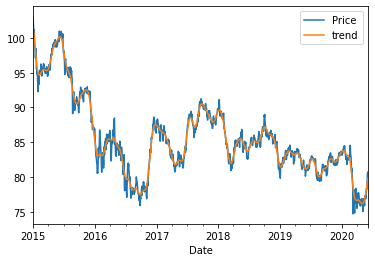

In [12]:
# Plot the Exchange Rate Price vs. the Trend for 2015 to the present
# YOUR CODE HERE!
cad_jpy_df_decomp.loc["2015-01-01":, :].plot(y=["Price", "trend"])

**Question:** Do you see any patterns, long-term and/or short?

**Answer:** YOUR ANSWER HERE
I am seeing a downward trend in the long term, and I am seeing a upward trend in the short term.

<AxesSubplot:xlabel='Date'>

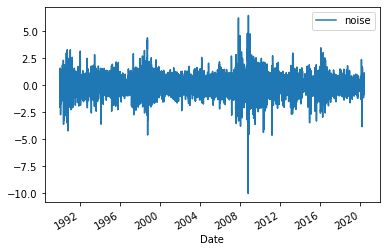

In [15]:
cad_jpy_df_decomp.loc[:, :].plot(y=[ "noise"])

<AxesSubplot:xlabel='Date'>

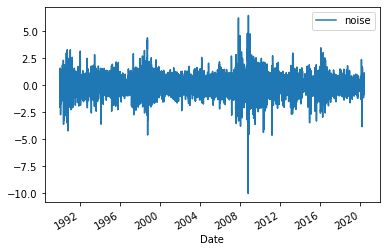

In [16]:
# Plot the Settle Noise
# YOUR CODE HERE!
cad_jpy_df_decomp.loc[:, :].plot(y=[ "noise"])

---

# Forecasting Returns using an ARMA Model

Using exchange rate *Returns*, estimate an ARMA model

1. ARMA: Create an ARMA model and fit it to the returns data. Note: Set the AR and MA ("p" and "q") parameters to p=2 and q=1: order=(2, 1).
2. Output the ARMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the forecasted returns (the results forecast from ARMA model)

In [17]:
# Create a series using "Price" percentage returns, drop any nan"s, and check the results:
# (Make sure to multiply the pct_change() results by 100)
# In this case, you may have to replace inf, -inf values with np.nan"s
returns = (cad_jpy_df[["Price"]].pct_change() * 100)
returns = returns.replace(-np.inf, np.nan).dropna()
returns.tail()

,Price
Date,
2020-05-29,0.076697
2020-06-01,1.251756
2020-06-02,1.425508
2020-06-03,0.373134
2020-06-04,0.012392


In [23]:
from statsmodels.tsa.arima_model import ARMA

In [26]:
returns.values

array([[-0.84671995],
       [-1.46847566],
       [ 0.87477726],
       ...,
       [ 1.42550776],
       [ 0.37313433],
       [ 0.01239157]])

In [42]:

# from statsmodels.tsa.arima_model import ARMA

# # Estimate and ARMA model using statsmodels (use order=(2, 1))
# # YOUR CODE HERE!
# model = ARMA(returns.values, order=(1, 1))

# # Fit the model and assign it to a variable called results
# # YOUR CODE HERE!
# results = model.fit()

In [25]:
# Output model summary results:
# YOUR CODE HERE!
print(arma_model.summary())

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                  Price   No. Observations:                 7928
Model:                     ARMA(2, 1)   Log Likelihood               -9751.978
Method:                       css-mle   S.D. of innovations              0.828
Date:                Mon, 09 Nov 2020   AIC                          19513.955
Time:                        14:38:33   BIC                          19548.846
Sample:                             0   HQIC                         19525.903
                                                                              
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const          -0.0022      0.009     -0.245      0.807      -0.020       0.016
ar.L1.Price    -0.8547      0.164     -5.200      0.000      -1.177      -0.533
ar.L2.Price    -0.0197      0.013     -1.475      0.140      -0.046       0.006
ma.L1.Price     0.8246      0.164      5.030      0.000       0.503       1.146
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.2033           +0.0000j            1.2033            0.5000
AR.2          -42.1702           +0.0000j           42.1702            0.5000
MA.1           -1.2127           +0.0000j            1.2127            0.5000
-----------------------------------------------------------------------------
"""

<AxesSubplot:title={'center':'5 Day Returns Forecast'}>

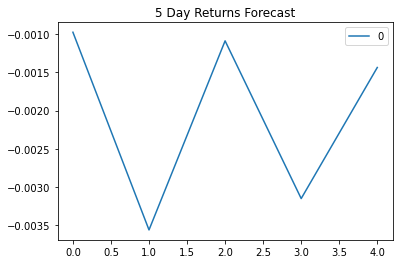

In [26]:
# Plot the 5 Day Returns Forecast
# YOUR CODE HERE!

**Question:** Based on the p-value, is the model a good fit?

**Answer:** YOUR ANSWER HERE

---

# Forecasting the Exchange Rate Price using an ARIMA Model

 1. Using the *raw* CAD/JPY exchange rate price, estimate an ARIMA model.
     1. Set P=5, D=1, and Q=1 in the model (e.g., ARIMA(df, order=(5,1,1))
     2. P= # of Auto-Regressive Lags, D= # of Differences (this is usually =1), Q= # of Moving Average Lags
 2. Output the ARIMA summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
 3. Plot a 5 day forecast for the Exchange Rate Price. What does the model forecast predict will happen to the Japanese Yen in the near term?

In [37]:

from statsmodels.tsa.arima.model import ARIMA
# Estimate and ARIMA Model:
# Hint: ARIMA(df, order=(p, d, q))
# YOUR CODE HERE!
arima_model = ARIMA(returns.values, order=(1, 1, 1))

# Fit the model
# YOUR CODE HERE!
arima_results = arima_model.fit()

In [39]:
# Output model summary results:
# YOUR CODE HERE!
arima_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 7928
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -9756.120
Date:                Thu, 14 Jul 2022   AIC                          19518.241
Time:                        17:12:15   BIC                          19539.175
Sample:                             0   HQIC                         19525.409
                               - 7928                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0304      0.007     -4.475      0.000      -0.044      -0.017
ma.L1         -1.0000      0.006   -180.537      0.000      -1.011      -0.989
sigma2         0.6855      0.007     96.404      0.000       0.672       0.699
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):             11640.06
Prob(Q):                              0.99   Prob(JB):                         0.00
Heteroskedasticity (H):               0.84   Skew:                            -0.38
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.89
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

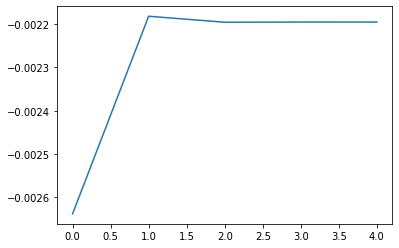

In [45]:
# Plot the 5 Day Price Forecast
# YOUR CODE HERE!
plt.plot(arima_results.forecast(5))

**Question:** What does the model forecast will happen to the Japanese Yen in the near term?

**Answer:** YOUR ANSWER HERE

---

# Volatility Forecasting with GARCH

Rather than predicting returns, let's forecast near-term **volatility** of Japanese Yen exchange rate returns. Being able to accurately predict volatility will be extremely useful if we want to trade in derivatives or quantify our maximum loss.
 
Using exchange rate *Returns*, estimate a GARCH model. **Hint:** You can reuse the `returns` variable from the ARMA model section.

1. GARCH: Create an GARCH model and fit it to the returns data. Note: Set the parameters to p=2 and q=1: order=(2, 1).
2. Output the GARCH summary table and take note of the p-values of the lags. Based on the p-values, is the model a good fit (p < 0.05)?
3. Plot the 5-day forecast of the volatility.

In [48]:
import arch as arch

In [56]:
# Estimate a GARCH model:
# YOUR CODE HERE!
garch_model = arch.arch_model(returns)

# Fit the model
# YOUR CODE HERE!
garch_results = garch_model.fit()

Iteration:      1,   Func. Count:      6,   Neg. LLF: 126813875.51886234
Iteration:      2,   Func. Count:     15,   Neg. LLF: 18856569.378668636
Iteration:      3,   Func. Count:     23,   Neg. LLF: 13378.174642762033
Iteration:      4,   Func. Count:     30,   Neg. LLF: 8972.954576494525
Iteration:      5,   Func. Count:     36,   Neg. LLF: 10953.943754137954
Iteration:      6,   Func. Count:     43,   Neg. LLF: 8994.523021094428
Iteration:      7,   Func. Count:     49,   Neg. LLF: 8933.807488445931
Iteration:      8,   Func. Count:     55,   Neg. LLF: 8942.984442452198
Iteration:      9,   Func. Count:     61,   Neg. LLF: 8910.346112068748
Iteration:     10,   Func. Count:     66,   Neg. LLF: 8910.289339831244
Iteration:     11,   Func. Count:     71,   Neg. LLF: 8910.285592755848
Iteration:     12,   Func. Count:     76,   Neg. LLF: 8910.28488573936
Iteration:     13,   Func. Count:     81,   Neg. LLF: 8910.284860267293
Iteration:     14,   Func. Count:     86,   Neg. LLF: 8910.28

In [57]:
# Summarize the model results
# YOUR CODE HERE!
garch_results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -8910.28
Distribution:                  Normal   AIC:                           17828.6
Method:            Maximum Likelihood   BIC:                           17856.5
                                        No. Observations:                 7928
Date:                Thu, Jul 14 2022   Df Residuals:                     7927
Time:                        17:18:01   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu         9.3168e-03  7.864e-03      1.185      0.236 [-6.096e-03,2.473e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      9.1838e-03  2.433e-03      3.775  1.601e-04 [4.415e-03,1.395e-02]
alpha[1]       0.0629  9.174e-03      6.861  6.826e-12 [4.497e-02,8.093e-02]
beta[1]        0.9236  1.131e-02     81.684      0.000     [  0.901,  0.946]
============================================================================

Covariance estimator: robust
"""

**Note:** Our p-values for GARCH and volatility forecasts tend to be much lower than our ARMA/ARIMA return and price forecasts. In particular, here we have all p-values of less than 0.05, except for alpha(2), indicating overall a much better model performance. In practice, in financial markets, it's easier to forecast volatility than it is to forecast returns or prices. (After all, if we could very easily predict returns, we'd all be rich!)

In [58]:
# Find the last day of the dataset
last_day = returns.index.max().strftime('%Y-%m-%d')
last_day

'2020-06-04'

In [59]:
# Create a 5 day forecast of volatility
forecast_horizon = 5

# Start the forecast using the last_day calculated above
# YOUR CODE HERE!
forecasts = garch_results.forecast(start=last_day, horizon=forecast_horizon)

In [60]:
# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 252)
intermediate.head()

,h.1,h.2,h.3,h.4,h.5
Date,,,,,
2020-06-04,12.512034,12.52065,12.529145,12.537521,12.545778


In [61]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T
final.head()

Date,2020-06-04
h.1,12.512034
h.2,12.520650
h.3,12.529145
h.4,12.537521
h.5,12.545778


<AxesSubplot:>

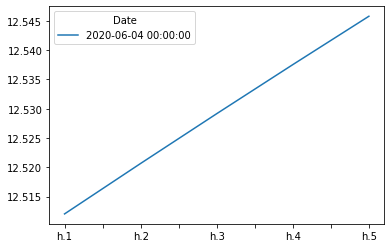

In [62]:
# Plot the final forecast
# YOUR CODE HERE!
final.plot()

**Question:** What does the model forecast will happen to volatility in the near term?

**Answer:** YOUR ANSWER HERE

---

# Conclusions

1. Based on your time series analysis, would you buy the yen now?

    There is a clear upward trend, so I would buy

2. Is the risk of the yen expected to increase or decrease?
    * I think the risk is low, so I would buy

3. Based on the model evaluation, would you feel confident in using these models for trading?
    * I would feel confident in using these models for trading